In [1]:
%cd drive/MyDrive/Complexity-Measure/

/content/drive/MyDrive/Complexity-Measure


In [3]:
!pip install gower;

  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4231 sha256=0fe13ef85a298e20089fa66732bd73a7b914e111d92dafb5e3ca41f57eb07015
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


In [4]:
from tensorflow.keras.applications import VGG16, Xception, ResNet50V2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist, cifar10
from measures import *
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC
from sklearn import svm

In [5]:
from keras import backend as K
K.clear_session()

# Classify datasets using neural network



In [ ]:
import keras
from keras.models import Sequential, Input, Model 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import classification_report

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10
classes = 10

## Generate the base model

In [ ]:
def train_model(x, y, z,train_X, train_label, valid_X, valid_label, test_X, test_Y_one_hot, Y_test_label):
  model = Sequential()
  model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape=(x,y,z), padding = 'same'))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
  model.add(LeakyReLU(alpha = 0.1))                  
  model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(128, activation = 'linear'))
  model.add(LeakyReLU(alpha = 0.1)) 
  model.add(Dropout(0.3))
  model.add(Dense(num_classes, activation = 'softmax'))

  model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

  history = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label)) 

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='lower right')
  plt.show()

  test_eval = model.evaluate(test_X, test_Y_one_hot, verbose = 0)
  print('Test loss: ', test_eval[0])
  print('Test accuracy: ', test_eval[1])

  predictes_classes = model.predict(test_X)
  predicted_classes = np.argmax(np.round(predictes_classes), axis = 1)

  target_names = ["Class {}".format(i) for i in range(classes)]
  print(classification_report(Y_test_label, predicted_classes, target_names = target_names))

  return model

## Classify MNIST dataset

In [6]:
(X_train_mnist, Y_train_mnist), (X_test_mnist, Y_test_mnist) = mnist.load_data()
X_train_mnist.shape, Y_train_mnist.shape, X_test_mnist.shape, Y_test_mnist.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_X = X_train_mnist.reshape(-1, 28, 28, 1)
test_X = X_test_mnist.reshape(-1, 28, 28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

from tensorflow.keras.utils import to_categorical

train_Y_one_hot = to_categorical(Y_train_mnist)
test_Y_one_hot = to_categorical(Y_test_mnist)

from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2)

train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

Epoch 1/20
750/750 [==============================] - 12s 14ms/step - loss: 0.6019 - accuracy: 0.7951 - val_loss: 0.0696 - val_accuracy: 0.9786
Epoch 2/20
750/750 [==============================] - 10s 13ms/step - loss: 0.0885 - accuracy: 0.9720 - val_loss: 0.0442 - val_accuracy: 0.9872
Epoch 3/20
750/750 [==============================] - 10s 13ms/step - loss: 0.0628 - accuracy: 0.9806 - val_loss: 0.0414 - val_accuracy: 0.9872
Epoch 4/20
750/750 [==============================] - 10s 13ms/step - loss: 0.0506 - accuracy: 0.9835 - val_loss: 0.0354 - val_accuracy: 0.9891
Epoch 5/20
750/750 [==============================] - 9s 13ms/step - loss: 0.0485 - accuracy: 0.9841 - val_loss: 0.0338 - val_accuracy: 0.9902
Epoch 6/20
750/750 [==============================] - 9s 12ms/step - loss: 0.0381 - accuracy: 0.9876 - val_loss: 0.0353 - val_accuracy: 0.9896
Epoch 7/20
750/750 [==============================] - 10s 13ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.0315 - val_accuracy: 0

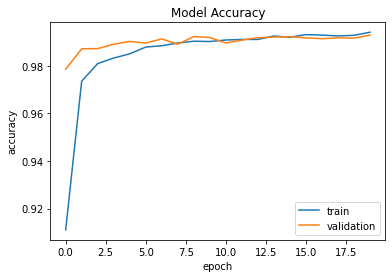

Test loss:  0.021731534972786903
Test accuracy:  0.9940999746322632
              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99       980
     Class 1       0.99      1.00      1.00      1135
     Class 2       1.00      1.00      1.00      1032
     Class 3       0.99      1.00      0.99      1010
     Class 4       0.99      0.99      0.99       982
     Class 5       1.00      0.99      0.99       892
     Class 6       1.00      0.99      0.99       958
     Class 7       1.00      0.99      0.99      1028
     Class 8       1.00      0.99      0.99       974
     Class 9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
model = train_model(28,28,1,train_X, train_label,valid_X, valid_label, test_X, test_Y_one_hot, Y_test_mnist)

##Classify CIFAR dataset

In [7]:
(X_train_cifar, Y_train_cifar), (X_test_cifar, Y_test_cifar) = cifar10.load_data()
X_train_cifar.shape, Y_train_cifar.shape

170500096/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000, 1))

In [ ]:
train_X = X_train_cifar.reshape(-1, 32, 32, 3)
test_X = X_test_cifar.reshape(-1, 32, 32, 3)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

from tensorflow.keras.utils import to_categorical

train_Y_one_hot = to_categorical(Y_train_cifar)
test_Y_one_hot = to_categorical(Y_test_cifar)

from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2)

train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

Epoch 1/20
625/625 [==============================] - 12s 16ms/step - loss: 1.8597 - accuracy: 0.3101 - val_loss: 1.2824 - val_accuracy: 0.5396
Epoch 2/20
625/625 [==============================] - 10s 16ms/step - loss: 1.3001 - accuracy: 0.5359 - val_loss: 1.0701 - val_accuracy: 0.6173
Epoch 3/20
625/625 [==============================] - 10s 16ms/step - loss: 1.1264 - accuracy: 0.6002 - val_loss: 0.9744 - val_accuracy: 0.6520
Epoch 4/20
625/625 [==============================] - 10s 15ms/step - loss: 1.0109 - accuracy: 0.6396 - val_loss: 0.9418 - val_accuracy: 0.6703
Epoch 5/20
625/625 [==============================] - 9s 15ms/step - loss: 0.9292 - accuracy: 0.6761 - val_loss: 0.8267 - val_accuracy: 0.7112
Epoch 6/20
625/625 [==============================] - 9s 15ms/step - loss: 0.8959 - accuracy: 0.6826 - val_loss: 0.8217 - val_accuracy: 0.7125
Epoch 7/20
625/625 [==============================] - 9s 14ms/step - loss: 0.8600 - accuracy: 0.7031 - val_loss: 0.7670 - val_accuracy: 0.

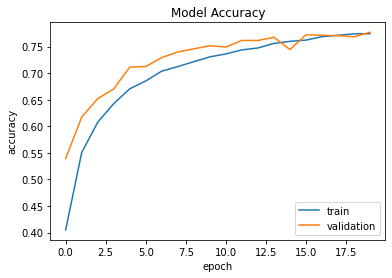

Test loss:  0.6759867668151855
Test accuracy:  0.7714999914169312
              precision    recall  f1-score   support

     Class 0       0.42      0.83      0.55      1000
     Class 1       0.92      0.86      0.89      1000
     Class 2       0.80      0.60      0.68      1000
     Class 3       0.67      0.55      0.60      1000
     Class 4       0.74      0.74      0.74      1000
     Class 5       0.83      0.51      0.63      1000
     Class 6       0.81      0.87      0.84      1000
     Class 7       0.89      0.74      0.81      1000
     Class 8       0.83      0.90      0.86      1000
     Class 9       0.90      0.81      0.86      1000

    accuracy                           0.74     10000
   macro avg       0.78      0.74      0.75     10000
weighted avg       0.78      0.74      0.75     10000



In [ ]:
model = train_model(32,32,3,train_X, train_label,valid_X, valid_label, test_X, test_Y_one_hot, Y_test_cifar)

# Classify datasets using PCA and SVM

## MNIST:

In [8]:
PCA_X_mnist = X_train_mnist
PCA_Y_mnist = Y_train_mnist
PCA_X_mnist = PCA_X_mnist/255
X_mnist_flat = PCA_X_mnist.reshape(-1, 28*28)
pca_mnist = PCA(0.9)
principalComponents_mnist = pca_mnist.fit_transform(X_mnist_flat)

PCA_X_mnist_test = X_test_mnist
PCA_X_mnist_test = PCA_X_mnist_test/255
X_mnist_flat = PCA_X_mnist_test.reshape(-1, 28*28)
pca_mnist = PCA(n_components=principalComponents_mnist.shape[1])
principalComponents_mnist_test = pca_mnist.fit_transform(X_mnist_flat)

In [11]:
pca_model_mnist = SVC(kernel = 'linear')
pca_model_mnist.fit(principalComponents_mnist, PCA_Y_mnist)
print("MNIST(linear SVM) dataset train accuracy: " + str(pca_model_mnist.score(principalComponents_mnist, PCA_Y_mnist)))
print("MNIST(linear SVM) dataset test accuracy: " + str(pca_model_mnist.score(principalComponents_mnist_test, Y_test_mnist)))

MNIST(linear SVM) dataset train accuracy: 0.9478833333333333
MNIST(linear SVM) dataset test accuracy: 0.1185


In [ ]:
pca_model_mnist_l = svm.NuSVC(gamma='auto')
pca_model_mnist_l.fit(principalComponents_mnist, PCA_Y_mnist)
print("MNIST dataset train accuracy: " + str(pca_model_mnist_l.score(principalComponents_mnist, PCA_Y_mnist)))
print("MNIST dataset test accuracy: " + str(pca_model_mnist_l.score(principalComponents_mnist_test, Y_test_mnist)))

MNIST dataset train accuracy: 0.9073833333333333
MNIST dataset test accuracy: 0.1487


## CIFAR:

In [9]:
PCA_X_cifar = X_train_cifar
PCA_Y_cifar = Y_train_cifar
PCA_X_cifar = PCA_X_cifar/255
X_cifar_flat = PCA_X_cifar.reshape(-1, 32*32*3)
pca_cifar = PCA(0.9)
principalComponents_cifar = pca_cifar.fit_transform(X_cifar_flat)

PCA_X_cifar_test = X_test_cifar
PCA_X_cifar_test = PCA_X_cifar_test/255
X_cifar_flat = PCA_X_cifar_test.reshape(-1, 32*32*3)
pca_cifar = PCA(n_components=principalComponents_cifar.shape[1])
principalComponents_cifar_test = pca_cifar.fit_transform(X_cifar_flat)

In [10]:
pca_model_cifar_l = SVC(kernel = 'linear')
pca_model_cifar_l.fit(principalComponents_cifar, PCA_Y_cifar)
print("CIFAR(linear SVM) dataset train accuracy: " + str(pca_model_cifar_l.score(principalComponents_cifar, PCA_Y_cifar)))
print("CIFAR(linear SVM) dataset test accuracy: " + str(pca_model_cifar_l.score(principalComponents_cifar_test, Y_test_cifar)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CIFAR(linear SVM) dataset train accuracy: 0.42042
CIFAR(linear SVM) dataset test accuracy: 0.1959


In [ ]:
pca_model_cifar = svm.NuSVC(gamma='auto')
pca_model_cifar.fit(principalComponents_cifar, PCA_Y_cifar)
print("CIFAR dataset train accuracy: " + str(pca_model_cifar.score(principalComponents_cifar, PCA_Y_cifar)))
print("CIFAR dataset test accuracy: " + str(pca_model_cifar.score(principalComponents_cifar_test, Y_test_cifar)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CIFAR dataset train accuracy: 0.65506
CIFAR dataset test accuracy: 0.2422


In [ ]:
FTR_X_mnist = np.load("vgg16_features_mnist.npy")
FTR_X_mnist = FTR_X_mnist[0:3000]
Y_mnist = Y_train_mnist[0:3000].reshape(3000)

In [ ]:
FTR_X_cifar = np.load("vgg16_features_cifar.npy")
FTR_X_cifar = FTR_X_cifar[0:3000]
Y_cifar = Y_train_cifar[0:3000].reshape(3000)

In [ ]:
def one_to_three_dim(x_train, dim):
  img_lst = []
  for i in range(len(x_train)):
    img = cv2.resize(x_train[i], dim, interpolation = cv2.INTER_AREA) 
    img = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    img_lst.append(img)
  rgb_arr = np.stack([img_lst],axis=4)
  rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
  return rgb_arr_to_3d

In [ ]:
def feature_extractor(images, model, x, y, z):
  feature_list = []
  for i in range(len(images)):
    img_array = np.expand_dims(images[i], axis=0)
    features = model.predict(img_array)
    feature_list.append(features)
  feat_lt = np.reshape(feature_list, (-1, x*y*z))
  return feat_lt

In [ ]:
dim = (32, 32)
rgb_list = one_to_three_dim(x_train_mnist, dim)
print(rgb_list.shape)

(60000, 32, 32, 3)


In [ ]:
vgg = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(32, 32, 3))

for layers in vgg.layers:
  layers.trainable=False

print(vgg.output)


58892288/58889256 [==============================] - 1s 0us/step
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")


In [ ]:
vgg_features_mnist = feature_extractor(rgb_list[0:10000], vgg, 1, 1, 512)
np.save("vgg16_features_mnist.npy", vgg_features_mnist)
vgg_features_cifar = feature_extractor(x_train_cifar[0:10000], vgg, 1, 1, 512)
np.save("vgg16_features_cifar.npy", vgg_features_cifar)

In [ ]:
compute_all_measures(principalComponents_mnist, PCA_Y_mnist)

F1 score:  0.3359367224187276
F1v score:  0.005616823738062841
F2 score:  2.8485389080841306e-08
F3 score:  0.32066666666666666
F4 score:  0.0
R1 score:  0.0005524411151404332
R2 score:  0.0033333333333333335
R3 score:  0.0016666666666666668
N1 score:  0.22466666666666665
N2 score:  0.43902639994577486
N3 score:  0.10966666666666669
N4 score:  0.010000000000000009
LSC score:  0.9938476666666667
Density score:  0.9454222518617317
ClsCoef score:  0.9397549228535682
Hubs score:  0.9925745949720821
T2 score:  0.027666666666666666
T3 score:  0.026333333333333334
T4 score:  0.9518072289156626
C1 score:  0.0013590429648728808
C2 score:  0.0007740423882753866


In [ ]:
compute_all_measures(principalComponents_cifar, PCA_Y_cifar)

F1 score:  0.8423932549142479
F1v score:  0.023228950602909984
F2 score:  1.3256690020637442e-09
F3 score:  0.909














F4 score:  0.0
R1 score:  0.0982323995978822
R2 score:  0.46366666666666667
R3 score:  0.3913333333333333
N1 score:  0.823
N2 score:  0.5106303173317676
N3 score:  0.7603333333333333
N4 score:  0.17966666666666664
LSC score:  0.9997744444444444
Density score:  0.9164176947871513
ClsCoef score:  0.9183178221149395
Hubs score:  0.9854144878013009
T2 score:  0.03166666666666667
T3 score:  0.030333333333333334
T4 score:  0.9578947368421052
C1 score:  0.0004004502936129084
C2 score:  0.0002273608255608517


In [ ]:
compute_all_measures(FTR_X_mnist, Y_mnist)

F1 score:  0.2711741534621569
F1v score:  0
F2 score:  0.0


/content/drive/MyDrive/Complexity-Measure/measures.py:163: RuntimeWarning: invalid value encountered in true_divide
  ratio = overlap_/range_


F3 score:  0.0








F4 score:  0.0
R1 score:  0.0
R2 score:  0.0
R3 score:  0.0
N1 score:  0.21133333333333335
N2 score:  0.4259964227012036
N3 score:  0.1166666666666667
N4 score:  0.057666666666666644
LSC score:  0.9936381111111111
Density score:  0.899673224408136
ClsCoef score:  0.900232645730753
Hubs score:  0.983892474439038
T2 score:  0.17066666666666666
T3 score:  0.07066666666666667
T4 score:  0.4140625
C1 score:  0.0013590429648728808
C2 score:  0.0007740423882753866


In [ ]:
compute_all_measures(FTR_X_cifar, Y_cifar)

F1 score:  0.7404271001611011
F1v score:  0
F2 score:  0.0


/content/drive/MyDrive/Complexity-Measure/measures.py:163: RuntimeWarning: invalid value encountered in true_divide
  ratio = overlap_/range_


F3 score:  0.0










F4 score:  0.0
R1 score:  0.0
R2 score:  0.0
R3 score:  0.0
N1 score:  0.721
N2 score:  0.5049166394624254
N3 score:  0.608
N4 score:  0.1266666666666667
LSC score:  0.9996926666666667
Density score:  0.9001158163832389
ClsCoef score:  0.898845411965076
Hubs score:  0.98248540919774
T2 score:  0.17066666666666666
T3 score:  0.12233333333333334
T4 score:  0.716796875
C1 score:  0.0004004502936129084
C2 score:  0.0002273608255608517


# Classify balanced wine dataset using SVM

In [20]:
from sklearn.datasets import load_wine

data_wine = load_wine()
Y_wine = data_wine.target
X_wine = data_wine.data
X_wine = X_wine[:,0:4]

X_wine_bal = X_wine
Y_wine_bal = Y_wine

In [21]:
classes, class_freqs = np.unique(Y_wine, return_counts=True)
a = max(class_freqs) - class_freqs[0]
b = max(class_freqs) - class_freqs[1]
c = max(class_freqs) - class_freqs[2]
counter =  a + b + c
while counter > 0:
    r = random.randint(0, X_wine.shape[0])
    if Y_wine[r] == classes[0] and a > 0:
        a = a -1
        X_wine_bal = np.append(X_wine_bal, [X_wine[r]], axis=0)
        Y_wine_bal = np.append(Y_wine_bal, [Y_wine[r]], axis=0)
        counter = counter - 1
    elif Y_wine[r] == classes[1] and b > 0:
        b = b - 1
        X_wine_bal = np.append(X_wine_bal, [X_wine[r]], axis=0)
        Y_wine_bal = np.append(Y_wine_bal, [Y_wine[r]], axis=0)
        counter = counter - 1
    elif Y_wine[r] == classes[2] and c > 0:
        c = c - 1
        X_wine_bal = np.append(X_wine_bal, [X_wine[r]], axis=0)
        Y_wine_bal = np.append(Y_wine_bal, [Y_wine[r]], axis=0)
        counter = counter - 1
classes, class_freqs = np.unique(Y_wine_bal, return_counts=True)
print(classes, class_freqs)

[0 1 2] [71 71 71]


In [22]:
from sklearn.model_selection import train_test_split
X_train_wine, X_test_wine, Y_train_wine, Y_test_wine = train_test_split(X_wine, Y_wine, test_size = 0.1)
X_train_wine_bal, X_test_wine_bal, Y_train_wine_bal, Y_test_wine_bal = train_test_split(X_wine_bal, Y_wine_bal, test_size = 0.1)

In [23]:
model_wine = SVC(kernel = 'linear')
model_wine.fit(X_train_wine, Y_train_wine)
print("wine dataset train accuracy: " + str(model_wine.score(X_train_wine, Y_train_wine)))
print("wine dataset test accuracy: " + str(model_wine.score(X_test_wine, Y_test_wine)))
print("-----------------------------------------------")
model_wine_bl = SVC(kernel = 'linear')
model_wine_bl.fit(X_train_wine_bal, Y_train_wine_bal)
print("wine(balanced) dataset train accuracy: " + str(model_wine_bl.score(X_train_wine_bal, Y_train_wine_bal)))
print("wine(balanced) dataset test accuracy: " + str(model_wine_bl.score(X_test_wine, Y_test_wine)))

wine dataset train accuracy: 0.86875
wine dataset test accuracy: 0.7222222222222222
-----------------------------------------------
wine(balanced) dataset train accuracy: 0.8586387434554974
wine(balanced) dataset test accuracy: 0.8333333333333334
